# Vectorfitting

This is a from scratch pure python implementation of the fast relaxed vectorfitting algorithm for MIMO frequency domain data. Different modes (standard VF, relaxed VF and fast relaxed VF) are implemented. Matrix shaped frequency domain data is supported, and a model with common poles is fitted

$$ \mathbf{H}_{fit}(s) = \mathbf{D} + s \cdot \mathbf{E} + \sum_{k=1}^{n} \mathbf{R}_{k} \cdot \frac{1}{s - p_k} $$

where $\mathbf{D}$ is the constant term, $\mathbf{E}$ is the linear term and $\mathbf{R}_{k}$, $p_k$ are the (possibly complex) residues in matrix form and poles. 

## Example

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

from vectorfitting import VecFit
from parsers import read_touchstone

In [2]:
#load data from snp file
Freq, H, *_ = read_touchstone(r"example_data/3port.s3p")

In [3]:
#initialize vectorfitting engine
VF = VecFit(H, Freq, n_cpx=5, n_real=1, mode="fast_relax", smart=False, autoreduce=True, fit_Const=True, fit_Diff=False)

#run fitting procedure
VF.fit(tol=1e-5, max_steps=15, debug=True)

debugging status : 
    iteration step number  (step)          : 0
    model order            (n_real, n_cpx) : 1, 5
    fitting relative error (mean, max)     : 0.49136901566282815, 2.657850202535424

debugging status : 
    iteration step number  (step)          : 1
    model order            (n_real, n_cpx) : 3, 4
    fitting relative error (mean, max)     : 0.0005314484496944583, 0.0037071766858198726

n_cpx: 4 -> 3
n_real: 3 -> 1
debugging status : 
    iteration step number  (step)          : 2
    model order            (n_real, n_cpx) : 1, 3
    fitting relative error (mean, max)     : 0.0006018634849112722, 0.009863669001006633

debugging status : 
    iteration step number  (step)          : 3
    model order            (n_real, n_cpx) : 1, 3
    fitting relative error (mean, max)     : 0.0006076050098630738, 0.00891959739913526

debugging status : 
    iteration step number  (step)          : 4
    model order            (n_real, n_cpx) : 1, 3
    fitting relative error (mea

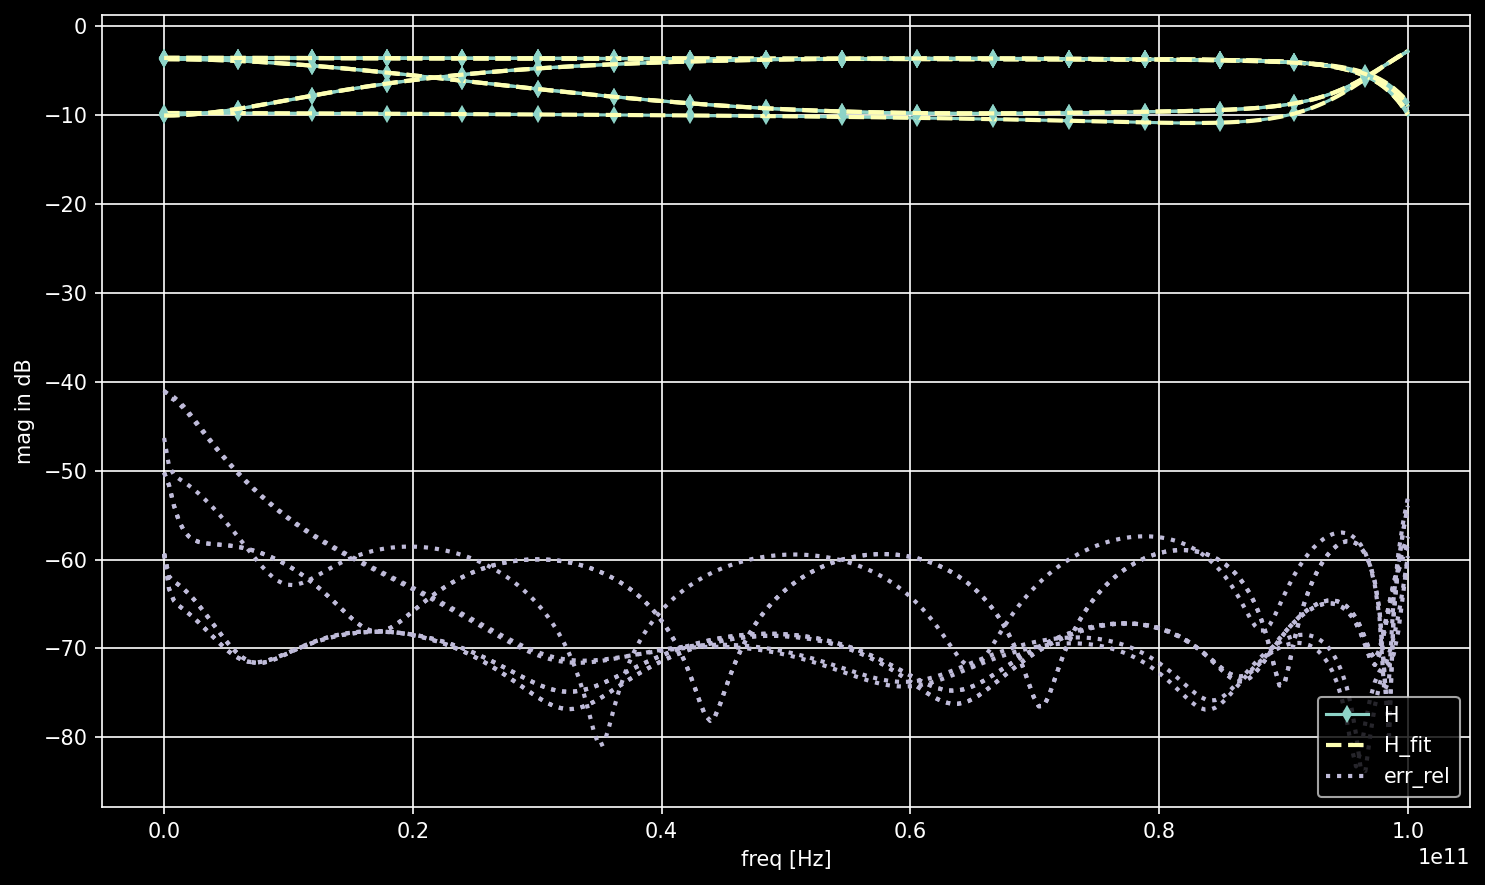

In [4]:
#evaluate fit
H_fit = VF.TF.evaluate(Freq)

#compute relative error
err_rel = (H - H_fit) / H

#dB helper
dB  = lambda x: 20*np.log10(abs(x))

#plot results
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6), tight_layout=True, dpi=150)

N, n, m = H.shape

for i in range(n):
    for j in range(m):
        ax.plot(Freq, dB(H[:,i,j]), "-d",  color=cycle[0], markevery=15, markersize=5, label="H" if i==j==0 else None)
        ax.plot(Freq, dB(H_fit[:,i,j]), "--", color=cycle[1], lw=2, label="H_fit" if i==j==0 else None)
        ax.plot(Freq, dB(err_rel[:,i,j]), ":", color=cycle[2], lw=2, label="err_rel" if i==j==0 else None)
        

ax.set_xlabel("freq [Hz]")
ax.set_ylabel("mag in dB")
ax.grid(True)
ax.legend(loc="lower right")

plt.savefig("test.svg")

## References

[1] Gustavsen, B. and Adam Semlyen. “Rational approximation of frequency domain responses by vector fitting.” IEEE Transactions on Power Delivery 14 (1999): 1052-1061.

[2] B. Gustavsen, "Improving the pole relocating properties of vector fitting," in IEEE Transactions on Power Delivery, vol. 21, no. 3, pp. 1587-1592, July 2006, doi: 10.1109/TPWRD.2005.860281.

[3] D. Deschrijver, M. Mrozowski, T. Dhaene and D. De Zutter, "Macromodeling of Multiport Systems Using a Fast Implementation of the Vector Fitting Method," in IEEE Microwave and Wireless Components Letters, vol. 18, no. 6, pp. 383-385, June 2008, doi: 10.1109/LMWC.2008.922585.

In [5]:
!jupyter nbconvert --ClearMetadataPreprocessor.enabled=True --ClearOutput.enabled=True --to markdown README.ipynb

[NbConvertApp] Converting notebook README.ipynb to markdown
[NbConvertApp] Support files will be in README_files\
[NbConvertApp] Making directory README_files
[NbConvertApp] Writing 6548 bytes to README.md
